### Parametr

In [98]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from IPython.display import Image

In [110]:
Alpha = 0.05
num = 10
total_number = 0
correct_number = 0
batch_len = 5

In [100]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

In [101]:
dataset = torchvision.datasets.ImageFolder(root='./dataflower102', transform=transform)
len(dataset)

8189

In [102]:
data_loader = torch.utils.data.DataLoader(dataset=dataset , shuffle=True , batch_size=5)
len(data_loader)

1638

In [103]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, shuffle=True, batch_size=5)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, shuffle=True, batch_size=5)
len(train_loader) , len(test_loader)

(1311, 328)

In [104]:
dataiter = iter(train_loader)
img, _ = next(dataiter)
img.shape

torch.Size([5, 3, 256, 256])

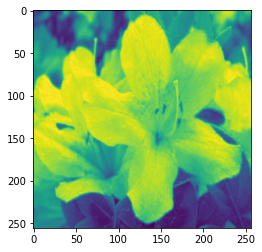

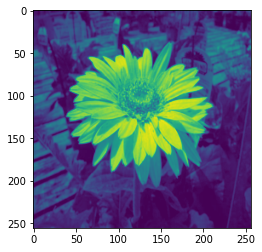

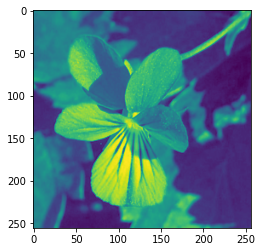

In [105]:
for i in range(3):
    plt.imshow(img[i][0] ,cmap='viridis')
    plt.show()

In [106]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN , self).__init__()

        self.cnv1  = nn.Conv2d(in_channels=3 , out_channels=8 , kernel_size=3) 
        self.pool = nn.MaxPool2d(2,2) 
        self.cnv2  = nn.Conv2d(in_channels=8 , out_channels=12 , kernel_size=3)
        self.f1    = nn.Linear(62 * 62 * 12 , 200)
        self.f2    = nn.Linear(200 , 160)
        self.f3    = nn.Linear(160 , 120)
        self.f4    = nn.Linear(120 , 102)

    def forward(self , x):

        out = self.cnv1(x) # 256 - 3 + 1 = 254
        out = torch.tanh(out) 
        out = self.pool(out)  # 254/2 = 127
        out = self.cnv2(out)  #127-3 + 1 = 125
        out = torch.tanh(out)
        out = self.pool(out)  #125 / 2 = 62
        # print(out.shape)
        out = torch.tanh(out)
        
        out = out.reshape(-1 , 62 * 62 * 12)

        out = self.f1(out)
        out = torch.tanh(out)
        out = self.f2(out)
        out = torch.tanh(out)
        out = self.f3(out)
        out = torch.tanh(out)
        out = self.f4(out)
        out = torch.tanh(out)

        return out
model = CNN()

In [107]:
loss = nn.CrossEntropyLoss()
optim= torch.optim.SGD(params=model.parameters() , lr=Alpha)

In [108]:
cnt = 0
for i in range(num):
    for index , (img , labl) in enumerate(train_loader):
        
        prd = model(img)
        ls = loss(prd , labl)
        ls.backward()

        optim.step()
        optim.zero_grad()
        
        if (cnt % 500== 0):
            print(cnt ,'. ' , "Loss = " , ls.item())
        cnt = cnt + 1

0 .  Loss =  4.517219543457031
500 .  Loss =  2.6963274478912354
1000 .  Loss =  2.690608263015747
1500 .  Loss =  2.6888747215270996
2000 .  Loss =  2.6880428791046143
2500 .  Loss =  2.6875617504119873
3000 .  Loss =  2.687236785888672
3500 .  Loss =  2.687014579772949
4000 .  Loss =  2.686847448348999
4500 .  Loss =  2.6867194175720215
5000 .  Loss =  2.6866166591644287
5500 .  Loss =  2.6865322589874268
6000 .  Loss =  2.686464786529541
6500 .  Loss =  2.6864068508148193
7000 .  Loss =  2.68635630607605
7500 .  Loss =  2.686314821243286
8000 .  Loss =  2.6862759590148926
8500 .  Loss =  2.6862425804138184
9000 .  Loss =  2.6862146854400635
9500 .  Loss =  2.686187267303467
10000 .  Loss =  2.686164379119873
10500 .  Loss =  2.6861424446105957
11000 .  Loss =  2.686124324798584
11500 .  Loss =  2.6861062049865723
12000 .  Loss =  2.6860897541046143
12500 .  Loss =  2.686075210571289
13000 .  Loss =  2.6860623359680176


In [111]:
with torch.no_grad():
    for img, labels in test_loader:
        pred = model(img)

        _, predict = torch.max(pred, 1)
        total_number += labels.size(0)
        correct_number += (predict == labels).sum().item()
        
    accuracy = (100.0 * (correct_number / total_number))
    print("Accuracy of the neural network is = " , accuracy,"%")

Accuracy of the neural network is =  100.0 %
